<a href="https://colab.research.google.com/github/ncsu-landscape-dynamics/LAMP_assay_automation/blob/main/masks_to_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2

##
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
##
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/John-Polo/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 29544, done.
remote: Counting objects: 100% (2086/2086), done.
remote: Compressing objects: 100% (548/548), done.
remote: Total 29544 (delta 1556), reused 1990 (delta 1499), pack-reused 27458
Receiving objects: 100% (29544/29544), 37.77 MiB | 27.84 MiB/s, done.
Resolving deltas: 100% (22171/22171), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be376084 version check against PyTorch's CUDA version


In [3]:
coco_names = [
    '__background__', 'well', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [4]:
# Load the model from the saved file:
model = torch.load('/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers/model/MaskInstanceModel.pth')
model.load_state_dict(torch.load('/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers/model/MaskModelParams.pth'))
model.eval()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
# Create a test batch with totally new images.
# The images will be manually rearranged images and masks.

from torchvision.io import read_image
from torchvision.transforms.functional import convert_image_dtype

rev_im1 = read_image('/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers/newtestimgs/set100m_vh_4.png')
rev_im2 = read_image('/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers/newtestimgs/set100m_vh_5.png')


# The data need to be converted to GPU, or cuda, compatible. 
# An example of loading model and data:
#device = torch.device("cuda")
#model = TheModelClass(*args, **kwargs)
#model.load_state_dict(torch.load(PATH))
#model.to(device)
# Make sure to call input = input.to(device) on any input tensors that you feed to the model

im1 = rev_im1.to(device)
im2 = rev_im2.to(device)

batch_int = torch.stack([im1, im2])
batch = convert_image_dtype(batch_int, dtype=torch.float)

new_dat = model(batch)

color_n = np.random.uniform(0, 255, size=(len(coco_names), 3))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


The following messages is returned from running the previous cell:

**/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)**

In [ ]:
# len(new_dat[0]) --> 4
# type(new_dat[0]) --> dict
# new_dat[0].keys() --> dict_keys(['boxes', 'labels', 'scores', 'masks'])

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [12]:
def small_table(in_mk):
    for vals,nums in zip(valus,numes):
        print(f"length of value {vals} {nums} times")


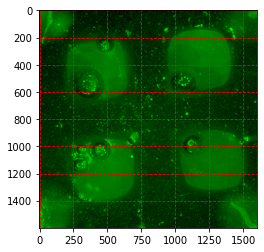

In [11]:
img1 = Image.fromarray(rev_im1.permute(1, 2, 0).byte().numpy())

plt.imshow(img1)
ax = plt.gca()
ax.grid(True, color='r', linestyle='--')
plt.draw()
plt.show()

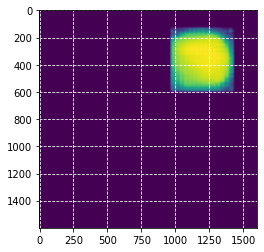

In [ ]:
pred1 = Image.fromarray(new_dat[0]['masks'][0, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

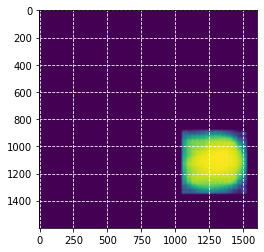

In [ ]:
pred1 = Image.fromarray(new_dat[0]['masks'][1, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

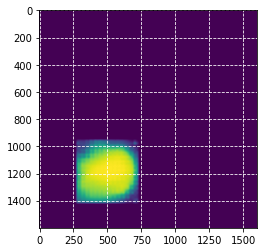

In [ ]:
pred1 = Image.fromarray(new_dat[0]['masks'][2, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

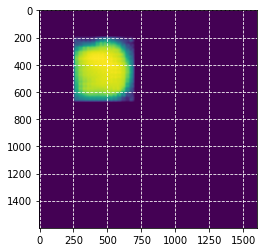

In [ ]:
pred1 = Image.fromarray(new_dat[0]['masks'][3, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

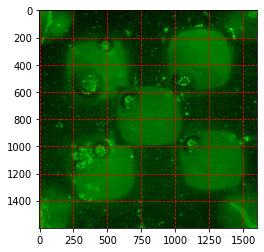

In [12]:
img3 = Image.fromarray(rev_im2.permute(1, 2, 0).byte().numpy())

plt.imshow(img3)
ax = plt.gca()
ax.grid(True, color='r', linestyle='--')
plt.draw()
plt.show()

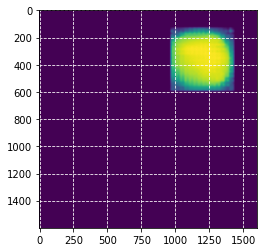

In [ ]:
pred1 = Image.fromarray(new_dat[1]['masks'][0, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

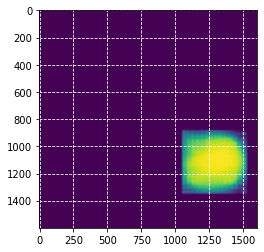

In [ ]:
pred1 = Image.fromarray(new_dat[1]['masks'][1, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

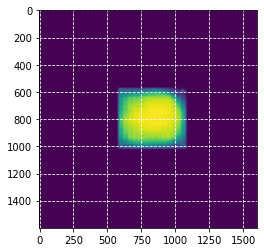

In [ ]:
pred1 = Image.fromarray(new_dat[1]['masks'][2, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

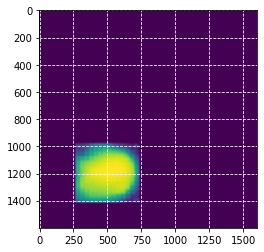

In [ ]:
pred1 = Image.fromarray(new_dat[1]['masks'][3, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

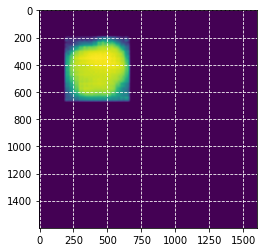

In [ ]:
pred1 = Image.fromarray(new_dat[1]['masks'][4, 0].mul(255).byte().cpu().numpy())

plt.imshow(pred1)
ax = plt.gca()
ax.grid(True, color='w', linestyle='--')
plt.draw()
plt.show()

The model returns a **Dict[Tensor]** during training, containing the classification and regression losses for both the RPN and the R-CNN, and the mask loss.

During inference, the model requires only the input tensors, and returns the post-processed predictions as a **List[Dict[Tensor]]**, one for each input image. The fields of the Dict are as follows, where N is the number of detected instances:

        boxes (FloatTensor[N, 4]): the predicted boxes in [x1, y1, x2, y2]
         format, with 0 <= x1 < x2 <= W and 0 <= y1 < y2 <= H.

        labels (Int64Tensor[N]): the predicted labels for each instance

        scores (Tensor[N]): the scores or each instance

        masks (UInt8Tensor[N, 1, H, W]): the predicted masks for each
         instance, in 0-1 range. In order to obtain the final segmentation
         masks, the soft masks can be thresholded, generally with a value
         of 0.5 (mask >= 0.5)



In [22]:
def get_outputs(image, model, threshold):
    with torch.no_grad():
        # forward pass of the image through the modle
        outputs = model(image)
    
    # get all the scores
    scores = list(outputs[0]['scores'].detach().cpu().numpy())
    # index of those scores which are above a certain threshold
    thresholded_preds_inidices = [scores.index(i) for i in scores if i > threshold]
    thresholded_preds_count = len(thresholded_preds_inidices)
    # get the masks
    masks = (outputs[0]['masks']>0.5).squeeze().detach().cpu().numpy()
    # discard masks for objects which are below threshold
    masks = masks[:thresholded_preds_count]
    # get the bounding boxes, in (x1, y1), (x2, y2) format
    boxes = [[(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))]  for i in outputs[0]['boxes'].detach().cpu()]
    # discard bounding boxes below threshold value
    boxes = boxes[:thresholded_preds_count]
    # get the classes labels
    labels = [coco_names[i] for i in outputs[0]['labels']]
    return masks, boxes, labels

In [15]:
def get_outputs(image, model, threshold):
    with torch.no_grad():
        # forward pass of the image through the modle
        outputs = model(image)
    
    # get all the scores
    scores = list(outputs[1]['scores'].detach().cpu().numpy())
    # index of those scores which are above a certain threshold
    thresholded_preds_inidices = [scores.index(i) for i in scores if i > threshold]
    thresholded_preds_count = len(thresholded_preds_inidices)
    # get the masks
    masks = (outputs[1]['masks']>0.5).squeeze().detach().cpu().numpy()
    # discard masks for objects which are below threshold
    masks = masks[:thresholded_preds_count]
    # get the bounding boxes, in (x1, y1), (x2, y2) format
    boxes = [[(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))]  for i in outputs[0]['boxes'].detach().cpu()]
    # discard bounding boxes below threshold value
    boxes = boxes[:thresholded_preds_count]
    # get the classes labels
    labels = [coco_names[i] for i in outputs[0]['labels']]
    return masks, boxes, labels

In [93]:
masks,boxes,labels = get_outputs(batch, model, 0.9)

In [94]:
# new_dat[0].keys() --> dict_keys(['boxes', 'labels', 'scores', 'masks'])
len(masks)

5

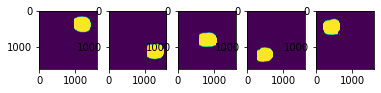

In [96]:
plt.subplot(1,5,1)
plt.imshow(masks[0,:,:])
plt.subplot(1,5,2)
plt.imshow(masks[1,:,:])
plt.subplot(1,5,3)
plt.imshow(masks[2,:,:])
plt.subplot(1,5,4)
plt.imshow(masks[3,:,:])
plt.subplot(1,5,5)
plt.imshow(masks[4,:,:])


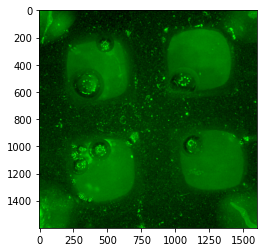

In [27]:
plt.imshow(batch[0].permute(1, 2, 0).mul(255).byte().cpu().numpy())

In [25]:
def draw_segmentation_map(image, masks, boxes, labels):
    alpha = 1 
    beta = 0.6 # transparency for the segmentation map
    gamma = 0 # scalar added to each sum
    for i in range(len(masks)):
        red_map = np.zeros_like(masks[i]).astype(np.uint8)
        green_map = np.zeros_like(masks[i]).astype(np.uint8)
        blue_map = np.zeros_like(masks[i]).astype(np.uint8)
        # apply a randon color mask to each object
        color = color_n[random.randrange(0, len(color_n))]
        red_map[masks[i] == 1], green_map[masks[i] == 1], blue_map[masks[i] == 1]  = color
        # combine all the masks into a single image
        segmentation_map = np.stack([red_map, green_map, blue_map], axis=2)
        #convert the original PIL image into NumPy format
        image = np.array(image)
        # convert from RGN to OpenCV BGR format
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # apply mask on the image
        cv2.addWeighted(image, alpha, segmentation_map, beta, gamma, image)
        # draw the bounding boxes around the objects
        cv2.rectangle(image, boxes[i][0], boxes[i][1], color=color, 
                      thickness=2)
        # put the label text above the objects
        cv2.putText(image , labels[i], (boxes[i][0][0], boxes[i][0][1]-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 
                    thickness=2, lineType=cv2.LINE_AA)
    
    return image

In [18]:
import transforms as T

transform1 = T.Compose([
    T.ToTensor()
])

In [ ]:
#image_path = args['input']
image = Image.open('/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers/newtestimgs/set100m_vh_4.png')
# keep a copy of the original image for OpenCV functions and applying masks
orig_image = image.copy()
# transform the image
image1, tar = transform1(image, "")
# add a batch dimension
image1 = image1.unsqueeze(0).to(device)

masks, boxes, labels = get_outputs(image1, model, 0.9)

resul = draw_segmentation_map(orig_image, masks, boxes, labels)

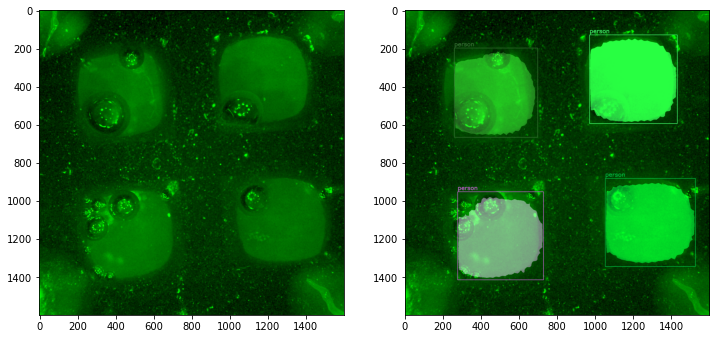

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(orig_image)
plt.subplot(1,2,2)
plt.imshow(resul)

In [121]:
image.shape

torch.Size([3, 1600, 1600])